In [25]:
from tensorflow.examples.tutorials.mnist import input_data

In [26]:
import tensorflow as tf

In [27]:
import matplotlib.pyplot as plt

In [28]:
import random

In [29]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [30]:
print(mnist.train.num_examples)

55000


In [31]:
nb_classes = 10

In [32]:
X = tf.placeholder(shape=[None, 784], dtype=tf.float32, name='X')

In [33]:
Y = tf.placeholder(shape=[None, nb_classes], dtype=tf.int32, name='Y')

In [34]:
with tf.name_scope('layer1') as scope:
    W1 = tf.Variable(tf.random_normal(shape=[784, 512]), shape=[784, 512], dtype=tf.float32, name='weight1')
    b1 = tf.Variable(tf.random_normal(shape=[512]), shape=[512], dtype=tf.float32, name='bias1')
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

In [35]:
with tf.name_scope('layer2') as scope:
    W2 = tf.Variable(tf.random_normal(shape=[512, 512]), shape=[512, 512], dtype=tf.float32, name='weight2')
    b2 = tf.Variable(tf.random_normal(shape=[512]), shape=[512], dtype=tf.float32, name='bias2')
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

In [36]:
with tf.name_scope('layer3') as scope:
    W3 = tf.Variable(tf.random_normal(shape=[512, 512]), shape=[512, 512], dtype=tf.float32, name='weight3')
    b3 = tf.Variable(tf.random_normal(shape=[512]), shape=[512], dtype=tf.float32, name='bias3')
    L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

In [37]:
with tf.name_scope('layer4') as scope:
    W4 = tf.Variable(tf.random_normal(shape=[512, 512]), shape=[512, 512], dtype=tf.float32, name='weight4')
    b4 = tf.Variable(tf.random_normal(shape=[512]), shape=[512], dtype=tf.float32, name='bias4')
    L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

In [38]:
with tf.name_scope('layer5') as scope:
    W5 = tf.Variable(tf.random_normal(shape=[512, 10]), shape=[512, 10], dtype=tf.float32, name='weight5')
    b5 = tf.Variable(tf.random_normal(shape=[10]), shape=[10], dtype=tf.float32, name='bias5')
    

In [39]:
hypotheis = tf.matmul(L4, W5) + b5

In [40]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=hypotheis, labels=Y)

In [41]:
cost = tf.reduce_mean(cost_i)

In [42]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [43]:
is_correct = tf.equal(tf.argmax(hypotheis, 1), tf.argmax(Y, 1))

In [44]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [45]:
# parameters

In [49]:
training_epochs = 30

In [50]:
batch_size = 100

Epoch: 0001 cost = 48028.700170454
Accuracy:  0.9007
Epoch: 0002 cost = 9295.059791593
Accuracy:  0.917
Epoch: 0003 cost = 4623.118549395
Accuracy:  0.9292
Epoch: 0004 cost = 2620.608112779
Accuracy:  0.9349
Epoch: 0005 cost = 1680.824367046
Accuracy:  0.9419
Epoch: 0006 cost = 1074.376513283
Accuracy:  0.9406
Epoch: 0007 cost = 816.939611809
Accuracy:  0.9471
Epoch: 0008 cost = 704.283517533
Accuracy:  0.95
Epoch: 0009 cost = 529.918848500
Accuracy:  0.9453
Epoch: 0010 cost = 552.802864202
Accuracy:  0.949
Epoch: 0011 cost = 578.811612311
Accuracy:  0.9496
Epoch: 0012 cost = 489.539929372
Accuracy:  0.9579
Epoch: 0013 cost = 551.171668822
Accuracy:  0.951
Epoch: 0014 cost = 401.943576274
Accuracy:  0.9557
Epoch: 0015 cost = 402.395651807
Accuracy:  0.9582
Epoch: 0016 cost = 432.642356506
Accuracy:  0.9571
Epoch: 0017 cost = 367.277661787
Accuracy:  0.9602
Epoch: 0018 cost = 284.777591043
Accuracy:  0.962
Epoch: 0019 cost = 301.083162483
Accuracy:  0.9635
Epoch: 0020 cost = 310.4134101

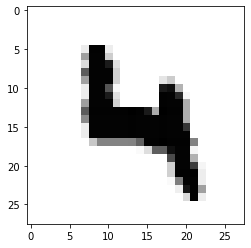

In [51]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
        # Test he model using test sets
        print('Accuracy: ', accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y: mnist.test.labels}))
        #print('Accuracy: ', sess.run(accuracy, feed_dict={X:mnist.test.images, Y: mnist.test.labels}))
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples -1)
    print('Label:', sess.run(tf.arg_max(mnist.test.labels[r:r+1], 1)))
    print('Prediction:', sess.run(tf.arg_max(hypotheis, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()